## Este codigo es para el diseno de ataques

### Librerías necesarias

In [228]:
from os.path import join, exists
from matplotlib.image import imread
from skimage.transform import resize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import tensorflow as tf

# Definición de rutas

In [229]:
data_path = 'D:\MaIE\Semestre3\RL\Data\TrafficSignals'
models_path = 'models'
train_data_path = 'D:\MaIE\Semestre3\RL\Data\TrafficSignals\Train'
labels_path = 'D:\MaIE\Semestre3\RL\Data\TrafficSignals\Test.csv'

### Cargar imágenes de testeo

In [230]:
data = []
labels = []
Table = pd.read_csv(labels_path)
Table['Path']
for j in range(0,Table['Path'].shape[0]):
    ima_path =join(data_path, Table['Path'][j])
    imagen = imread(ima_path,-1)
    imagen = resize(imagen,(32,32))
    data.append(imagen)
    labels.append(Table['ClassId'][j])

In [231]:
data2 = np.array(data)
labels2 = np.array(labels)
print(data2.shape,labels2.shape)

(12630, 32, 32, 3) (12630,)


In [232]:
X_test = data2
y_test = labels2

12


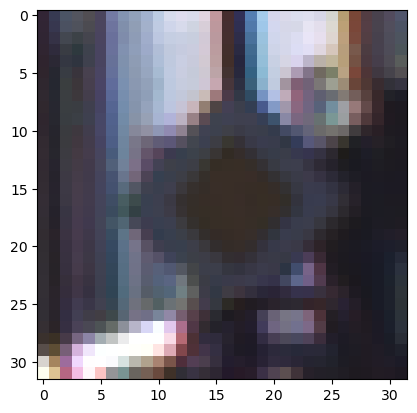

In [233]:
test_images = [X_test[10], X_test[30], X_test[26], X_test[40],  X_test[9]]
test_labels = [y_test[10], y_test[30], y_test[26], y_test[40], y_test[9]]
test_image = test_images[0]
test_label = test_labels[0]
plt.imshow(test_image)
print(test_label)

In [234]:
model_path = join(models_path, 'florez_solarte.h5')
traffic_model = load_model(model_path)

In [235]:
R = traffic_model(test_image.reshape(1,32,32,3))
Ref = np.argmax(R) # y
print(Ref) # prediccion
print(tf.constant(to_categorical(Ref,43).reshape(1,43)))

12
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 43), dtype=float32)


In [236]:
loss_obj = tf.keras.losses.CategoricalCrossentropy() # entradas y & f(x,theta) [prediccion]

In [237]:
with tf.GradientTape() as g:
    imagen = tf.cast(test_image.reshape(1,32,32,3),tf.float32) # x
    g.watch(imagen) 
    prediction = traffic_model(imagen) # f(x,theta)
    loss = loss_obj(tf.constant(to_categorical(Ref,43).reshape(1,43)),prediction)
gradient = g.gradient(loss,imagen)
sign_grad = tf.sign(gradient)

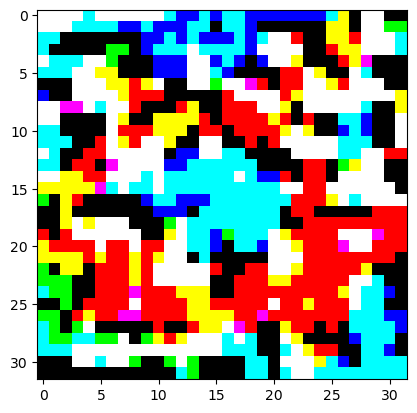

In [238]:
# perturbacion
disturbance = sign_grad[0]*0.5+0.5 #pasa de [-1,1] a [0,1]
plt.imshow(disturbance)

In [239]:
# epsilon = 0.069
# epsilons = [0.0058, 0.008, 0.013, 0.0009, 0.06]
# epsilons = [0.0031, 0.037, 0.034, 0.0058, 0.091]
# epsilons = []
epsilon = 0.5
adv = imagen+epsilon*sign_grad
R2 = traffic_model(adv)
print(np.argmax(R2))

30


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


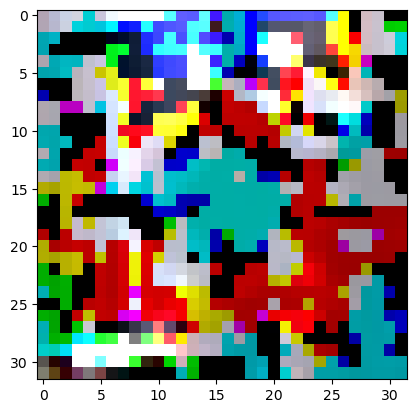

In [240]:
plt.imshow(adv[0])

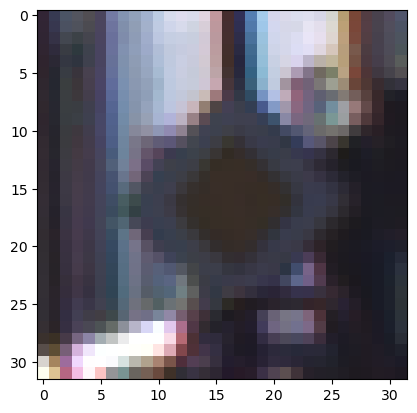

In [241]:
plt.imshow(test_image)